Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


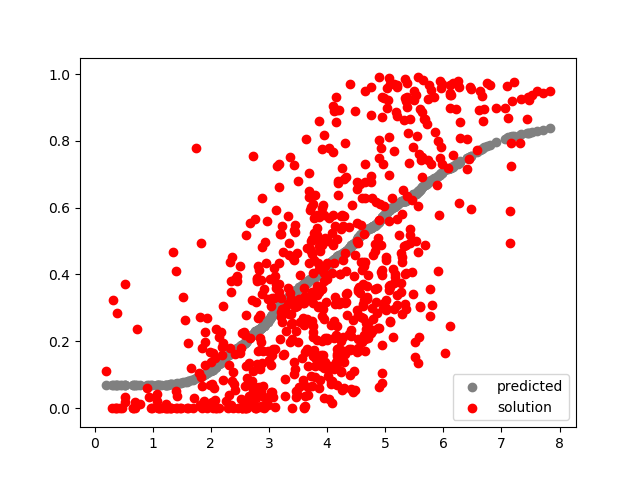

Mean Squared Error: 0.04682318617276387
Root Mean Squared Error: 0.2163866589528196


<IPython.core.display.Javascript object>


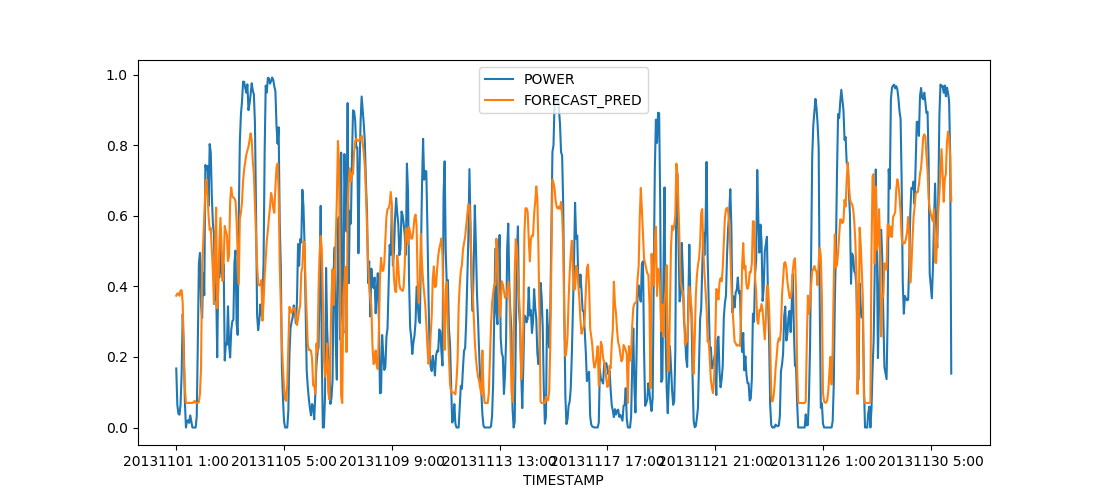

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math
%matplotlib

# Get data
working_dir = os.getcwd()
data_dir = working_dir + '/Data/'
traindatakNN = pd.read_csv(data_dir + 'TrainData.csv')
forecast_inputkNN = pd.read_csv(data_dir + "WeatherForecastInput.csv").filter(['WS10'])
solutionkNN = pd.read_csv(data_dir + "Solution.csv")

XkNN = np.array(traindatakNN[['WS10']])
ykNN = np.array(traindatakNN['POWER'])

# Set up the model (including number of k's)
model = KNeighborsRegressor(n_neighbors=2000)
model.fit(XkNN, ykNN)

pred_y = model.predict(forecast_inputkNN)

# Print predicted power production based on forecast
#print("Prediction:", pred_y)

# Plot prediction based on forecast vs true power production
ax = plt.subplot()
ax.scatter(forecast_inputkNN, pred_y, c='grey', label='predicted')
ax.scatter(forecast_inputkNN, solutionkNN['POWER'], c='r', label='solution')
plt.legend(loc='lower right')
plt.show()

# Find and print RMSE
mse = mean_squared_error(solutionkNN['POWER'], pred_y)
print("Mean Squared Error:", mse)

rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Store prediction
solutionkNN = pd.read_csv(data_dir + "Solution.csv")
solvedkNN = solutionkNN.drop(['POWER'], axis=1)
solvedkNN["FORECAST"] = pred_y
solvedkNN.to_csv(data_dir+"ForecastTemplate1-kNN.csv")

solutionkNN = solutionkNN.set_index('TIMESTAMP')
solvedPlotkNN = solutionkNN
solvedPlotkNN["FORECAST_PRED"] = pred_y
solvedPlotkNN.plot(figsize=(11,5))